In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('Zoo.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
fig = px.scatter(data, x="animal name", y="type")
fig.show()

In [5]:
for col in data.select_dtypes(include=np.number).columns:
    fig = px.histogram(data, x=col, nbins=30)
    fig.show()

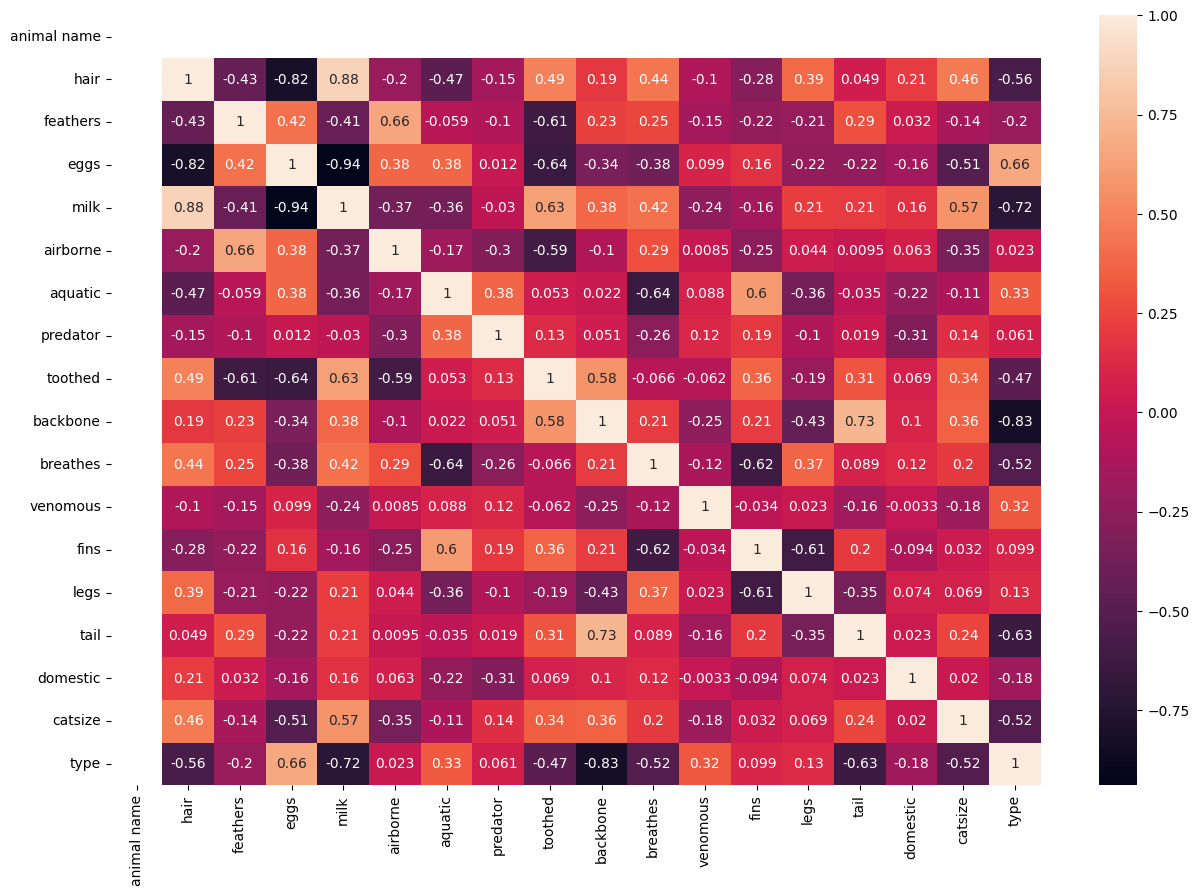

In [6]:
data=data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# data preprocessing

In [7]:
data.duplicated().sum()

np.int64(42)

In [13]:
data.isnull().sum()

animal name    101
hair             0
feathers         0
eggs             0
milk             0
airborne         0
aquatic          0
predator         0
toothed          0
backbone         0
breathes         0
venomous         0
fins             0
legs             0
tail             0
domestic         0
catsize          0
type             0
dtype: int64

In [15]:
data2=data.select_dtypes(include=np.number)
data2

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,NaN,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,NaN,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,NaN,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,NaN,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,NaN,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,NaN,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,NaN,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


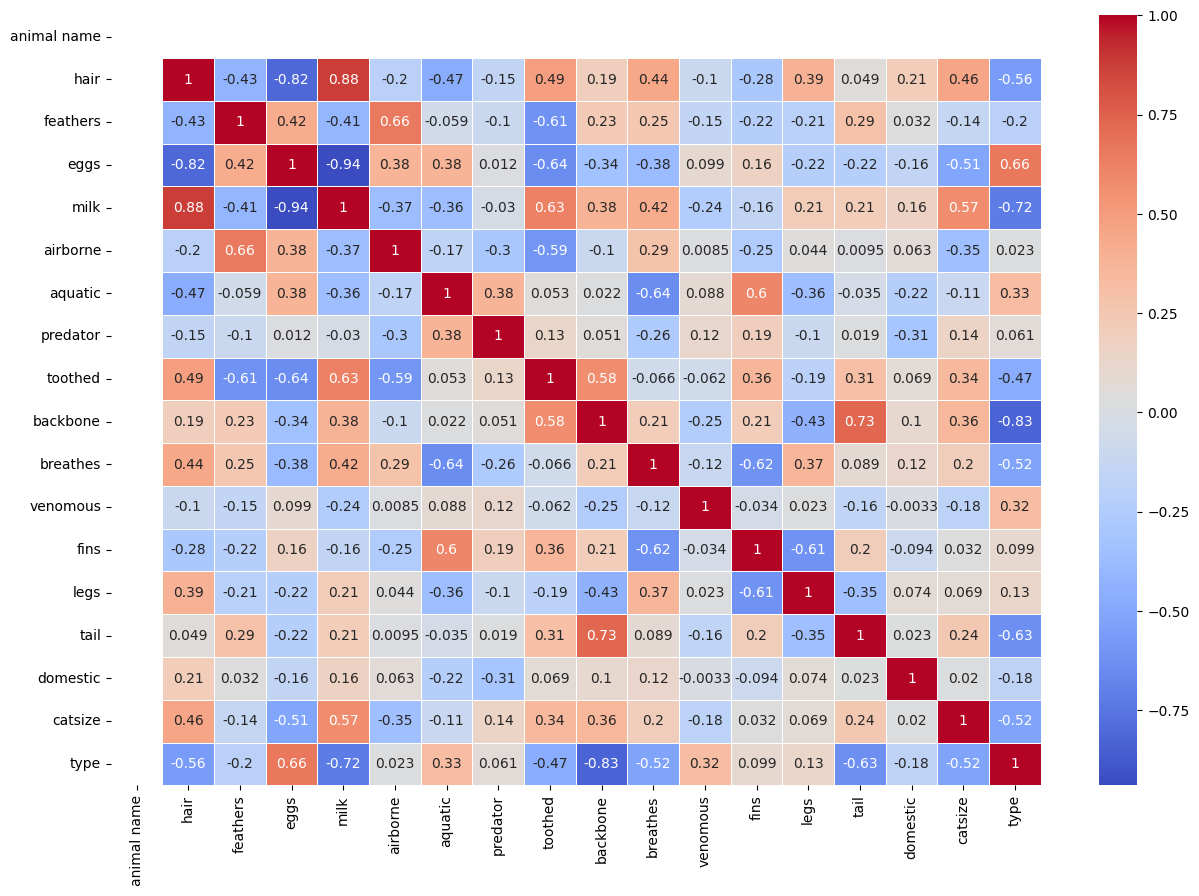

In [16]:
data2=data2.apply(pd.to_numeric, errors='coerce')
correlation_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   animal name  0 non-null      float64
 1   hair         101 non-null    int64  
 2   feathers     101 non-null    int64  
 3   eggs         101 non-null    int64  
 4   milk         101 non-null    int64  
 5   airborne     101 non-null    int64  
 6   aquatic      101 non-null    int64  
 7   predator     101 non-null    int64  
 8   toothed      101 non-null    int64  
 9   backbone     101 non-null    int64  
 10  breathes     101 non-null    int64  
 11  venomous     101 non-null    int64  
 12  fins         101 non-null    int64  
 13  legs         101 non-null    int64  
 14  tail         101 non-null    int64  
 15  domestic     101 non-null    int64  
 16  catsize      101 non-null    int64  
 17  type         101 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 14.3 KB


In [21]:
data2=data2.drop(columns=['animal name'])

In [22]:
data_encoded = pd.get_dummies(data2, columns=['legs']).astype(int)
data_encoded.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [23]:
data1=data_encoded.copy()
data1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,6,0,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,7,1,0,0,0,0,0


# Train and Test

In [24]:
x=data1.drop('type',axis=1)
y=data1['type']
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size= .20, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 21) (21, 21) (80,) (21,)


# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [27]:
y_train_pred = knn.predict(X_train)
y_train_pred

array([5, 5, 6, 1, 7, 6, 3, 1, 1, 2, 3, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4,
       2, 4, 1, 1, 1, 5, 3, 1, 7, 6, 1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1,
       1, 1, 7, 1, 4, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 3,
       2, 4, 2, 2, 7, 1, 4, 4, 2, 4, 2, 7, 4, 6])

In [28]:
accuracy_score(y_train, y_train_pred)

0.975

In [29]:
knn.predict(X_test)

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3])

# choose an appropriate distance metric and value for KNN

In [31]:
x=data1.drop('type',axis=1)
y=data1['type']

In [32]:
num = np.array(range(1,40))
param_grid = dict(n_neighbors=num)

In [33]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

c:\Users\revan\Sravani Mam\DSA\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [34]:
grid.best_score_

np.float64(0.96)

In [35]:
grid.best_params_

{'n_neighbors': np.int64(1)}

In [36]:
classification_report(y_test,knn.predict(X_test))

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        12\n           2       1.00      1.00      1.00         2\n           3       1.00      1.00      1.00         1\n           4       1.00      1.00      1.00         2\n           6       1.00      1.00      1.00         3\n           7       1.00      1.00      1.00         1\n\n    accuracy                           1.00        21\n   macro avg       1.00      1.00      1.00        21\nweighted avg       1.00      1.00      1.00        21\n'

<Axes: >

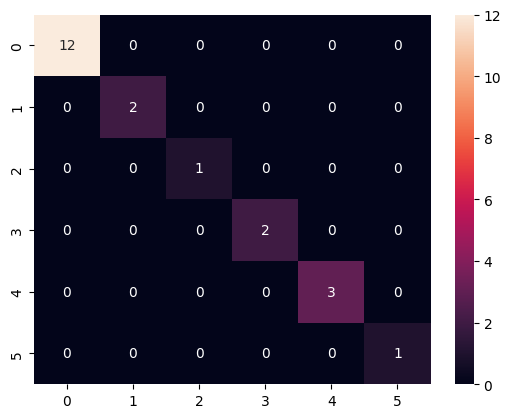

In [37]:
sns.heatmap(confusion_matrix(y_test,knn.predict(X_test)),annot=True)

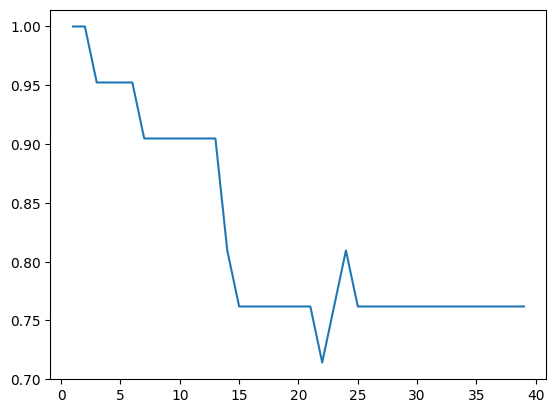

In [38]:
k_range = range(1,40)
k_score = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    k_score.append(score)
plt.plot(k_range,k_score)
plt.show()

# Visualize the decision boundaries

c:\Users\revan\Sravani Mam\DSA\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=5.



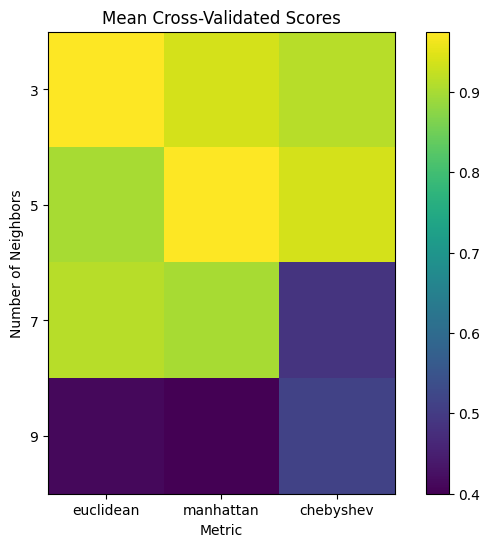

In [39]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'chebyshev'] 
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']
n_neighbors_values = [params[i]['n_neighbors'] for i in range(len(params))]
metric_values = [params[i]['metric'] for i in range(len(params))]
z = np.array(mean_scores).reshape(len(param_grid['n_neighbors']), len(param_grid['metric']))
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(z, interpolation='nearest', cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(np.arange(len(param_grid['metric'])))
ax.set_xticklabels(param_grid['metric'])
ax.set_yticks(np.arange(len(param_grid['n_neighbors'])))
ax.set_yticklabels(param_grid['n_neighbors'])
ax.set_xlabel('Metric')
ax.set_ylabel('Number of Neighbors')
ax.set_title('Mean Cross-Validated Scores')
plt.show()

In [40]:
from sklearn.decomposition import PCA

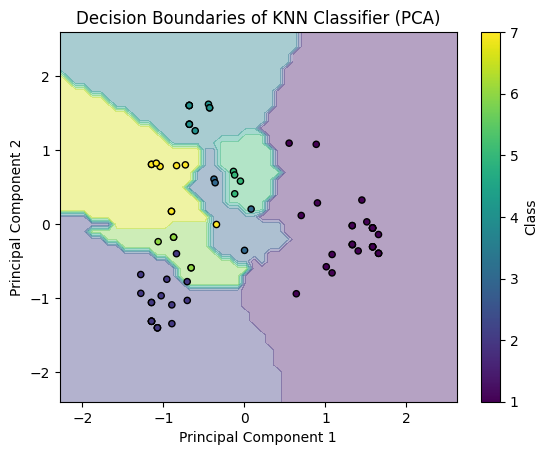

In [41]:
if X_train.ndim > 2:
    X_train = X_train.reshape(X_train.shape[0], -1) # Reshape to (num_samples, num_features)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
best_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
best_knn.fit(X_train_pca, y_train)
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of KNN Classifier (PCA)')
plt.colorbar(label='Class')
plt.show()

# Interview Questions

What are the key hyperparameters in KNN?

n_neighbors:

This hyperparameter determines the number of neighbors used for classification. A higher value typically leads to smoother decision boundaries but might increase computational complexity.

weights:

This hyperparameter determines the weight function used in prediction. It can be set to 'uniform', where all points in each neighborhood are weighted equally, or 'distance', where closer neighbors have more influence than farther neighbors.

metric:

This hyperparameter specifies the distance metric used to measure the distance between points. Common choices include Euclidean distance, Manhattan distance, and Chebyshev distance.

algorithm:

This hyperparameter specifies the algorithm used to compute nearest neighbors. Options include 'brute', 'kd_tree', and 'ball_tree', each with its own advantages and disadvantages in terms of speed and memory usage.

What distance metrics can be used in KNN?

Euclidean Distance: The most common distance metric, defined as the straight-line distance between two points in Euclidean space. It works well when the data is continuous.
Manhattan Distance (L1 norm): Also known as city block distance, it sums the absolute differences between the feature values. This is often used when the data has high dimensionality or when feature magnitudes vary greatly.
Minkowski Distance: A generalization of both Euclidean and Manhattan distances. It has a parameter p that controls the type of distance:
When p = 1, it becomes Manhattan distance.
When p = 2, it becomes Euclidean distance.
Chebyshev Distance: This is the maximum absolute difference along any coordinate dimension. It is useful in specific grid-like scenarios.
Hamming Distance: Used for categorical data, where the distance is simply the number of positions at which corresponding symbols are different.